# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [3]:
!kaggle datasets download -d brsahan/vehicle-co2-emissions-dataset

Dataset URL: https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset
License(s): apache-2.0
  0% 0.00/87.7k [00:00<?, ?B/s]
100% 87.7k/87.7k [00:00<00:00, 50.4MB/s]


In [4]:
!unzip vehicle-co2-emissions-dataset.zip

Archive:  vehicle-co2-emissions-dataset.zip
  inflating: co2.csv                 


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [6]:
df = pd.read_csv("co2.csv")
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3860,INFINITI,QX80 4WD,SUV - STANDARD,5.6,8,AS7,Z,17.4,12.2,15.1,19,355
1335,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,4.3,6,A6,X,13.4,9.9,11.9,24,274
4731,FORD,F-150 FFV (LT Tire Pkg),PICKUP TRUCK - STANDARD,5.0,8,AS10,X,14.7,11.2,13.1,22,307
2495,CHRYSLER,300 FFV,FULL-SIZE,3.6,6,A8,X,12.4,7.7,10.3,27,240
3695,FORD,FOCUS RS AWD,MID-SIZE,2.3,4,M6,Z,12.2,9.4,10.9,26,256


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
df.describe(include='all')

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385,7385,7385,7385.000000,7385.000000,7385,7385,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
unique,42,2053,16,NaN,NaN,27,5,NaN,NaN,NaN,NaN,NaN
top,FORD,F-150 FFV 4X4,SUV - SMALL,NaN,NaN,AS6,X,NaN,NaN,NaN,NaN,NaN
freq,628,32,1217,NaN,NaN,1324,3637,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.160068,5.615030,NaN,NaN,12.556534,9.041706,10.975071,27.481652,250.584699
std,NaN,NaN,NaN,1.354170,1.828307,NaN,NaN,3.500274,2.224456,2.892506,7.231879,58.512679
min,NaN,NaN,NaN,0.900000,3.000000,NaN,NaN,4.200000,4.000000,4.100000,11.000000,96.000000
25%,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.100000,7.500000,8.900000,22.000000,208.000000
50%,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,12.100000,8.700000,10.600000,27.000000,246.000000
75%,NaN,NaN,NaN,3.700000,6.000000,NaN,NaN,14.600000,10.200000,12.600000,32.000000,288.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [9]:
df.isna().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [10]:
df.duplicated().sum()

1103

In [11]:
numeric_features = df.select_dtypes(include=['number']).columns
categoric_features = df.select_dtypes(include=['object']).columns

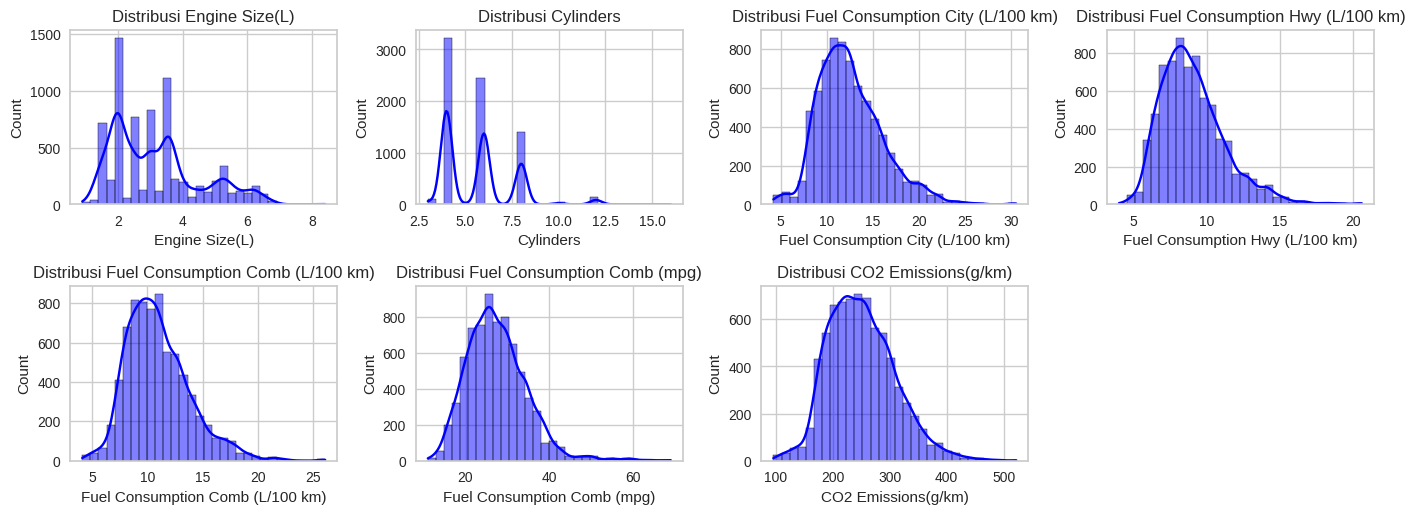

In [12]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

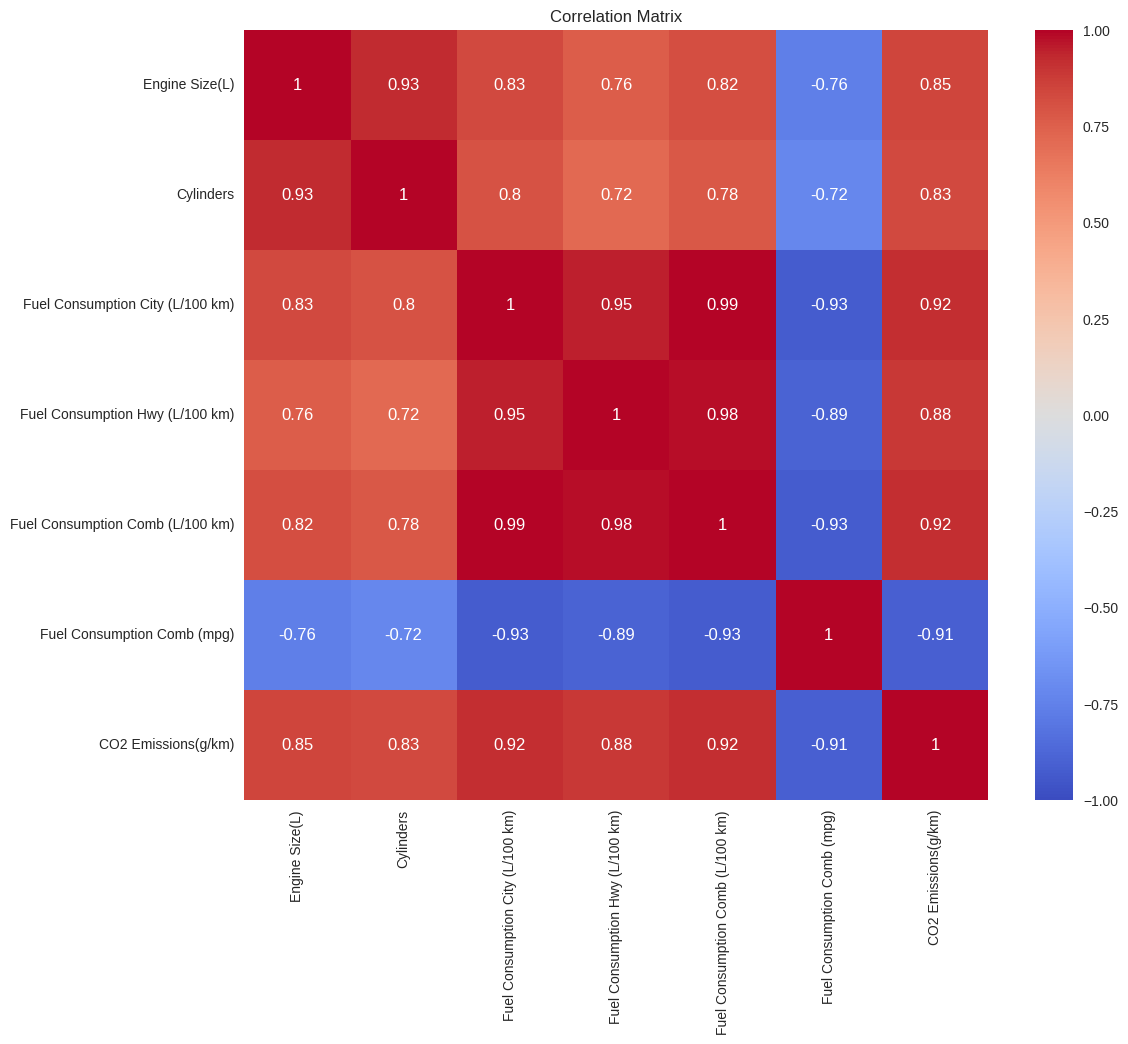

In [13]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))

correlation_matrix = df[numeric_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [14]:
df.drop_duplicates(inplace=True)

## handling outliers

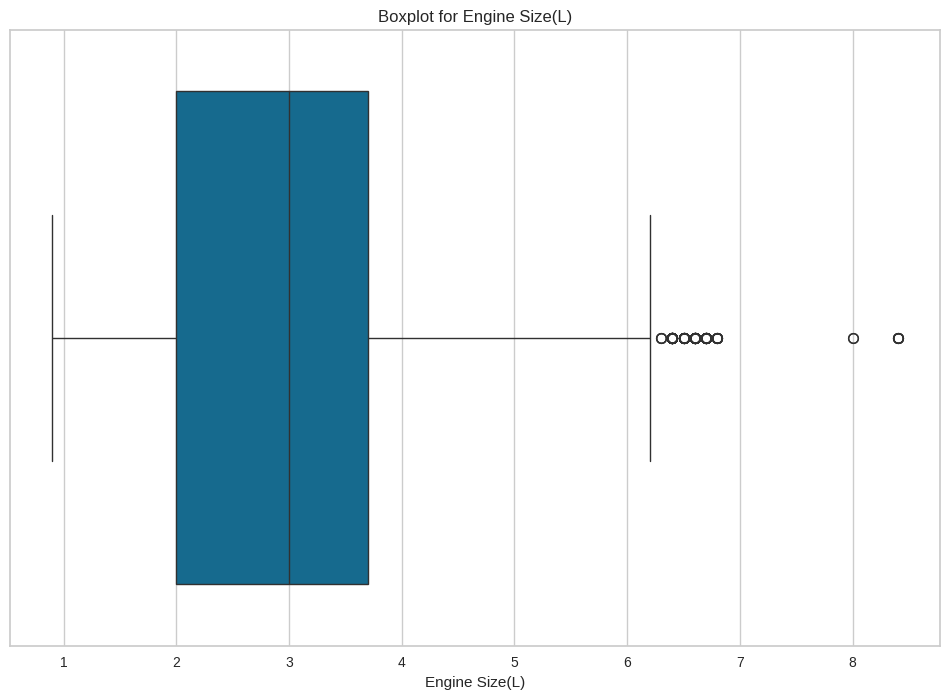

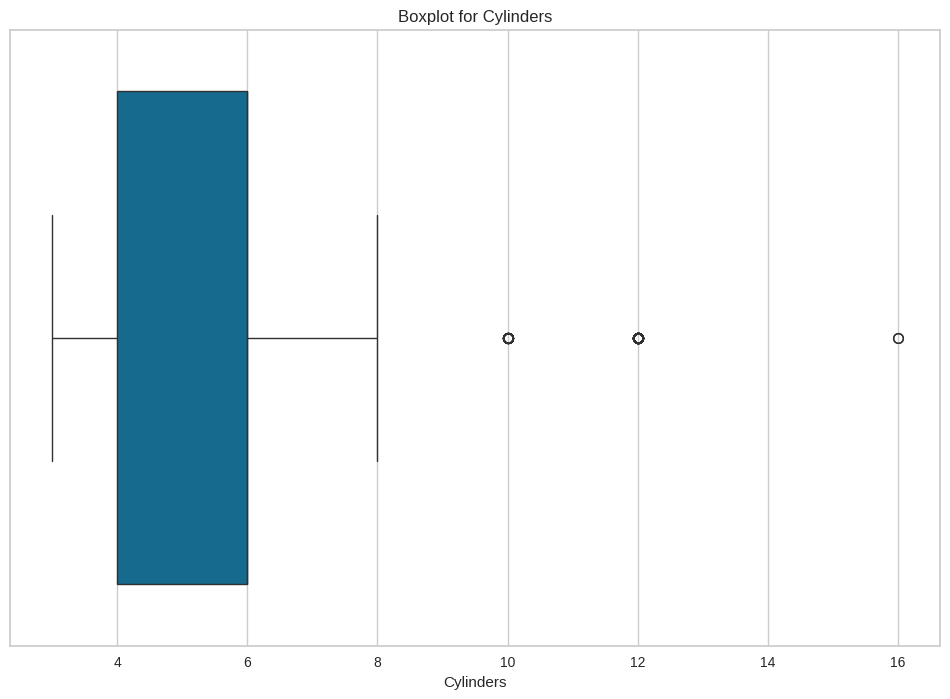

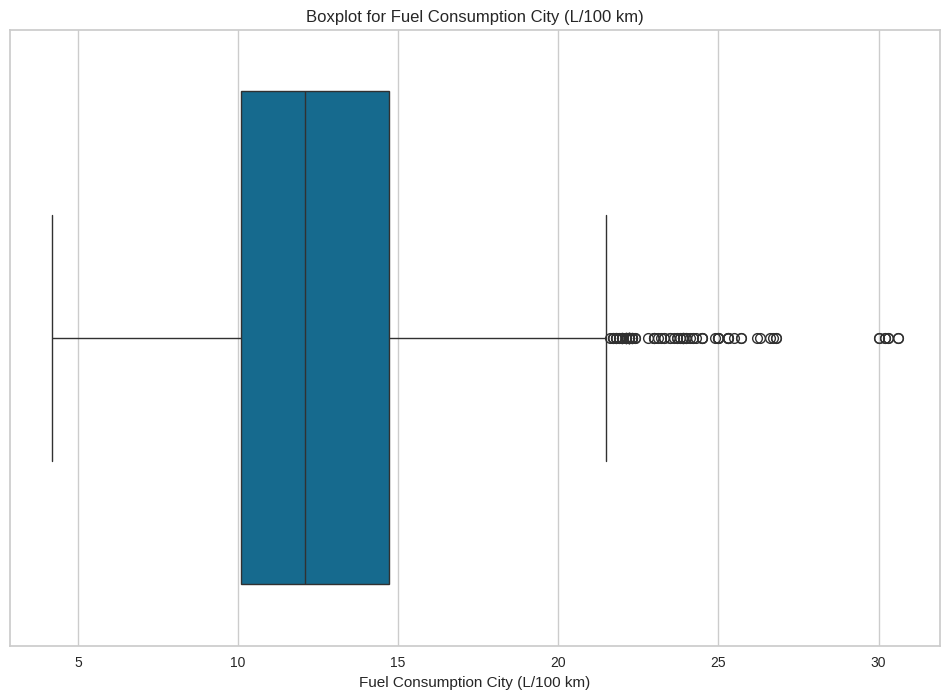

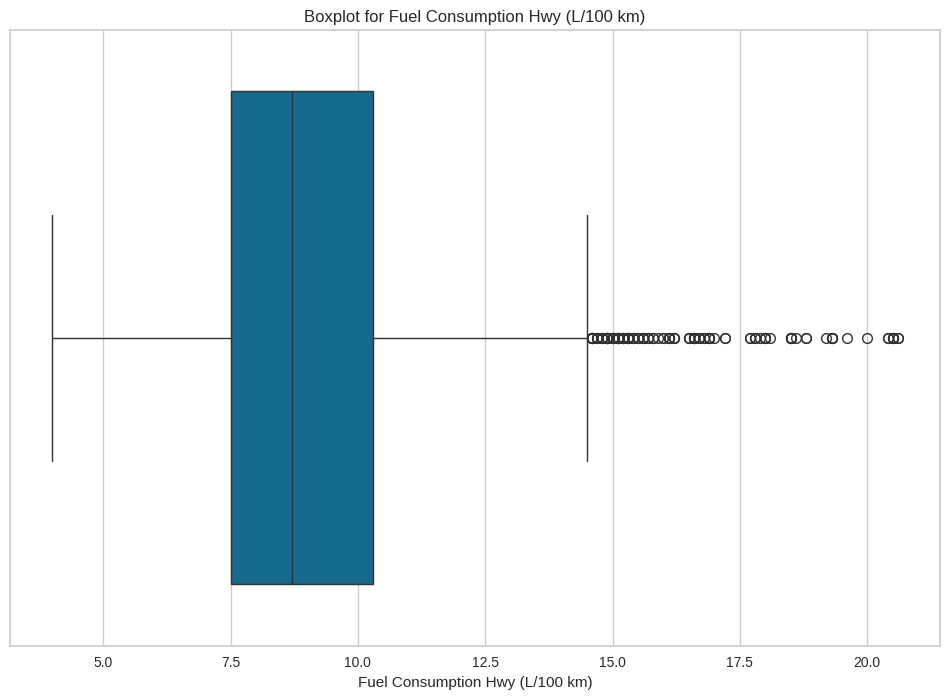

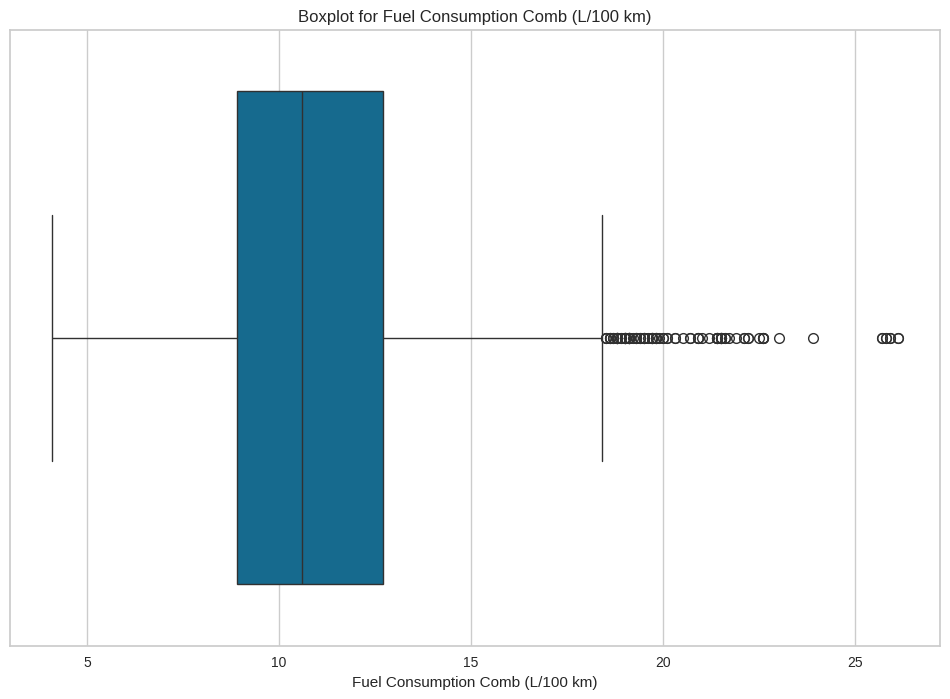

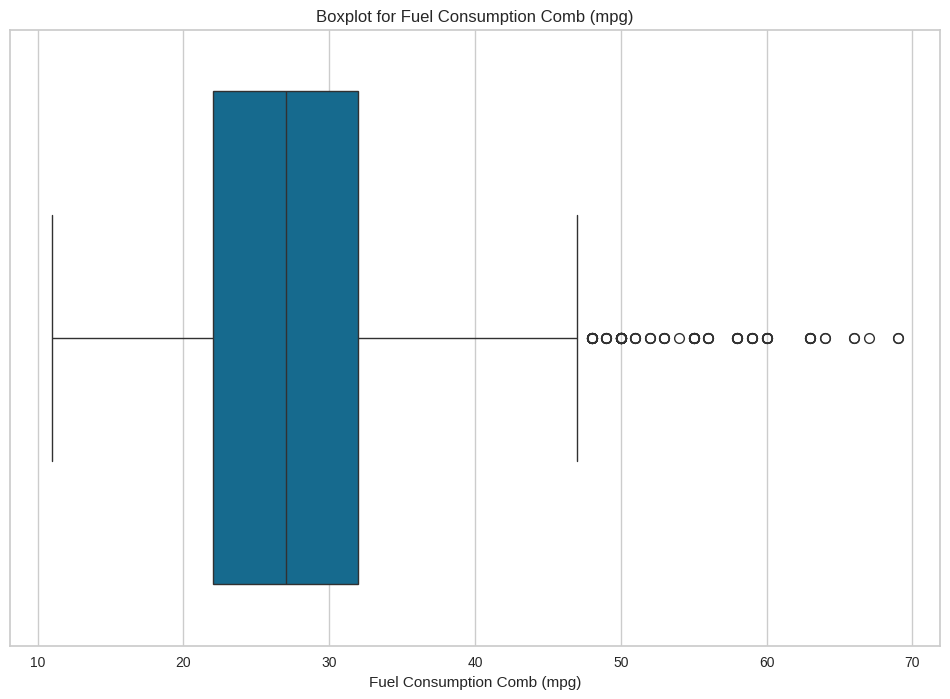

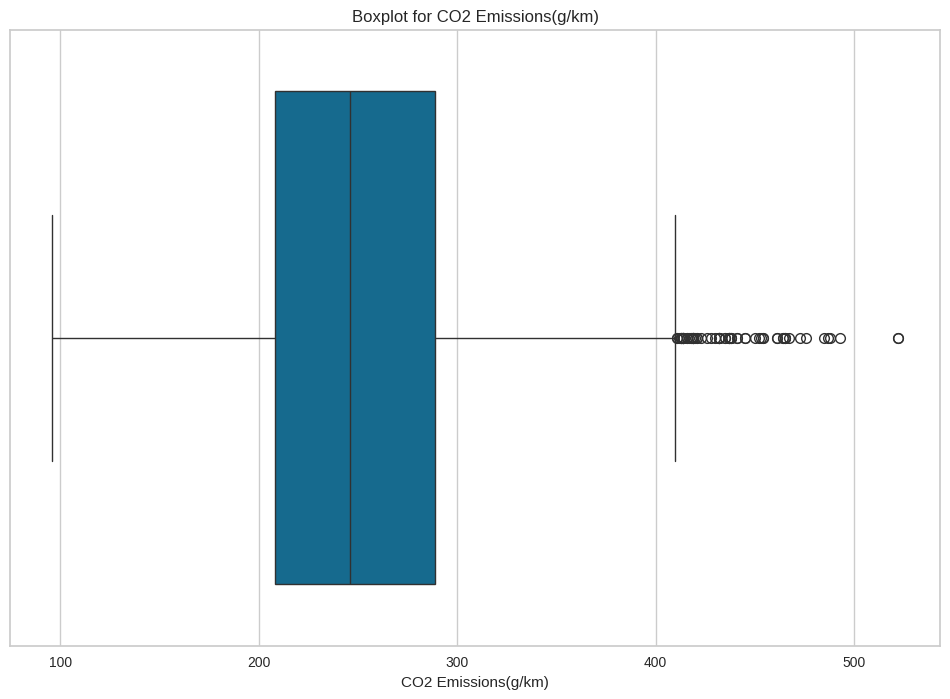

In [15]:
# Plot boxplots for each feature
for feature in df[numeric_features].columns:
  plt.figure(figsize=(12, 8))
  sns.boxplot(data=df[feature], orient="h")
  plt.title(f"Boxplot for {feature}")
  plt.show()

In [16]:
#Detect and remove outliers
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
df['Outlier'] = isolation_forest.fit_predict(df[numeric_features])
cleaned_df = df[df['Outlier'] == 1].drop(columns=['Outlier'])  # Keep only inliers

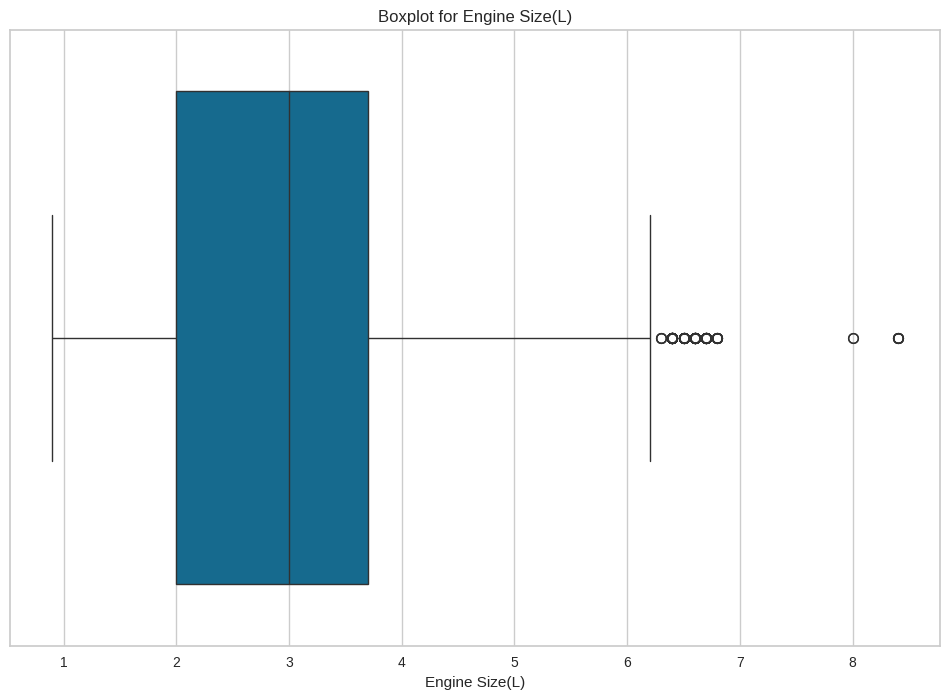

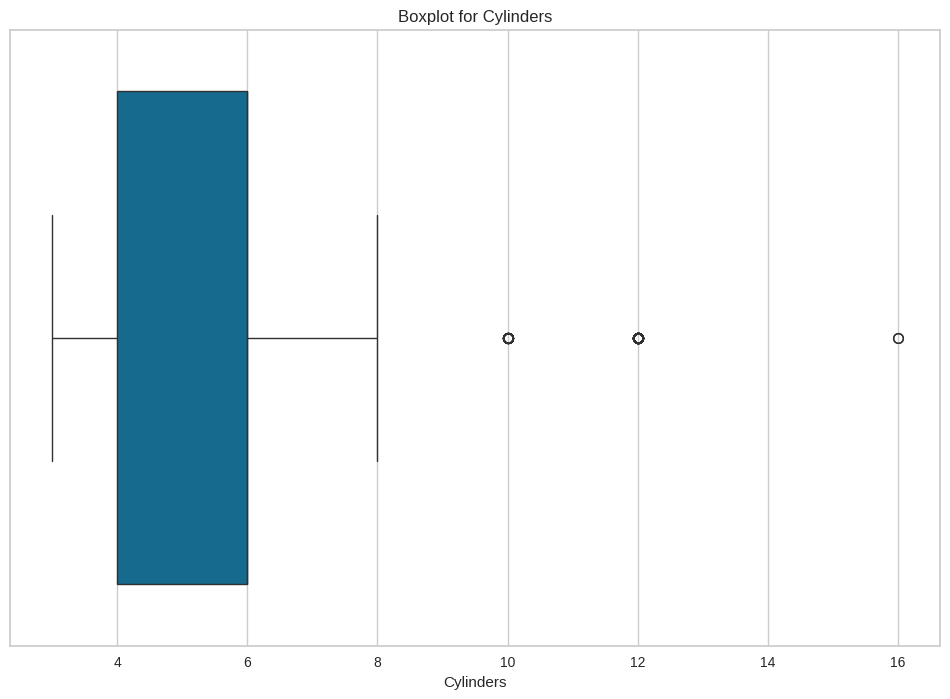

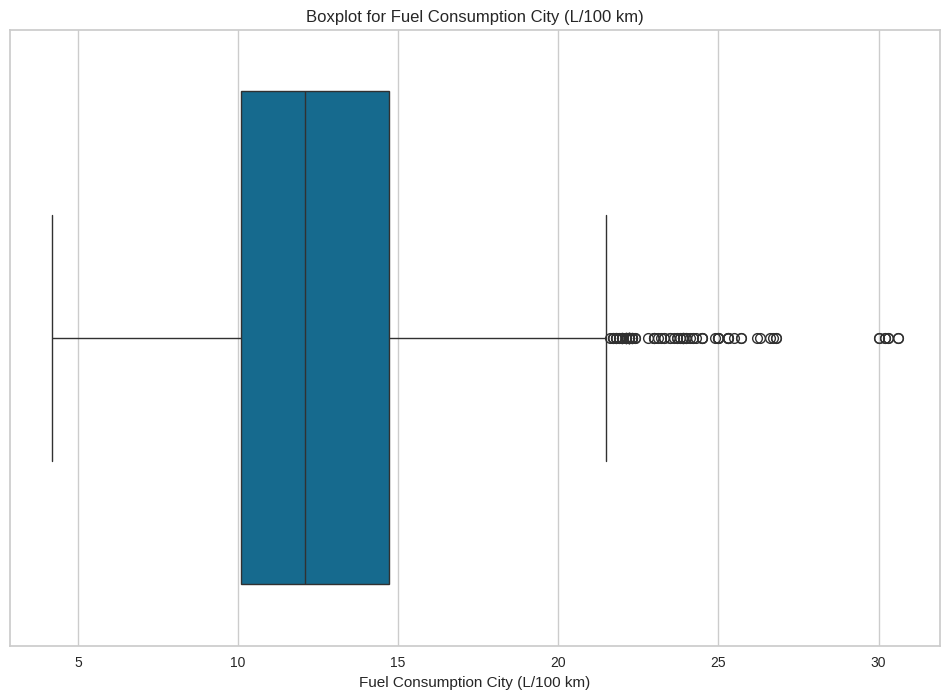

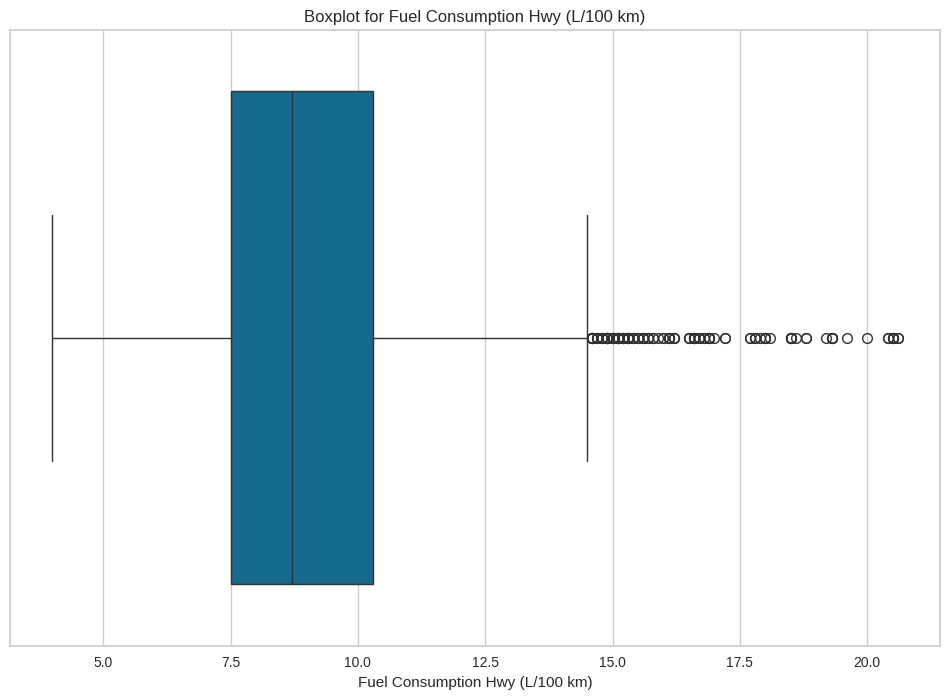

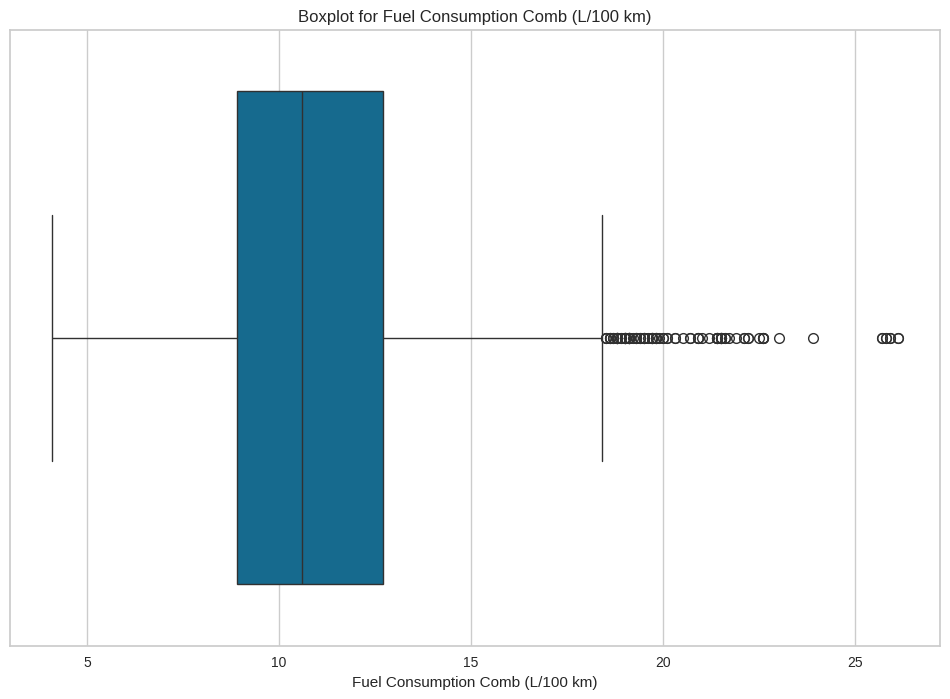

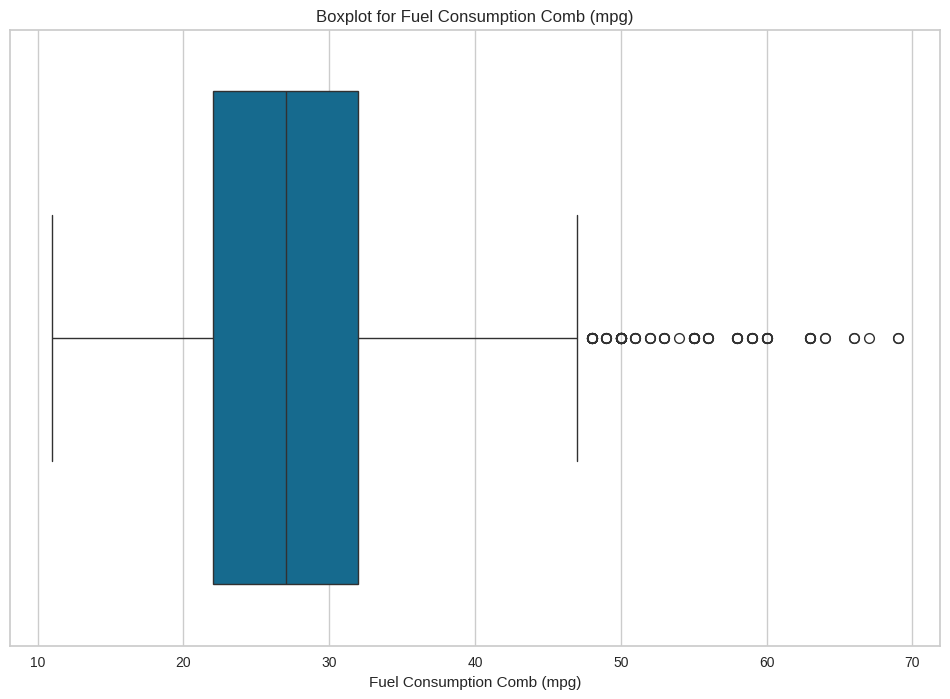

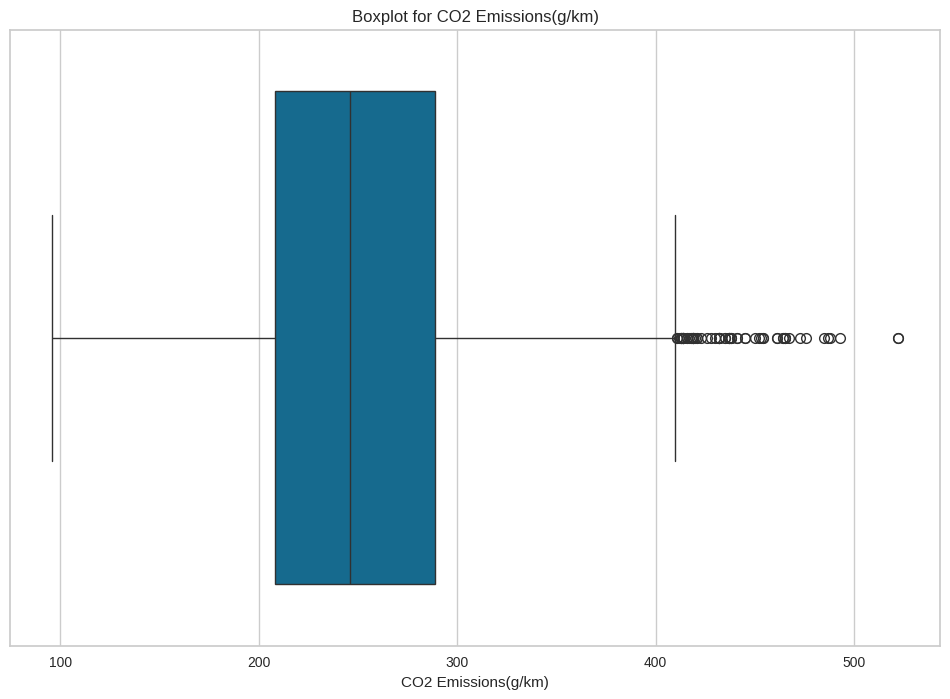

In [17]:
# Plot boxplots for each feature
for feature in df[numeric_features].columns:
  plt.figure(figsize=(12, 8))
  sns.boxplot(data=df[feature], orient="h")
  plt.title(f"Boxplot for {feature}")
  plt.show()

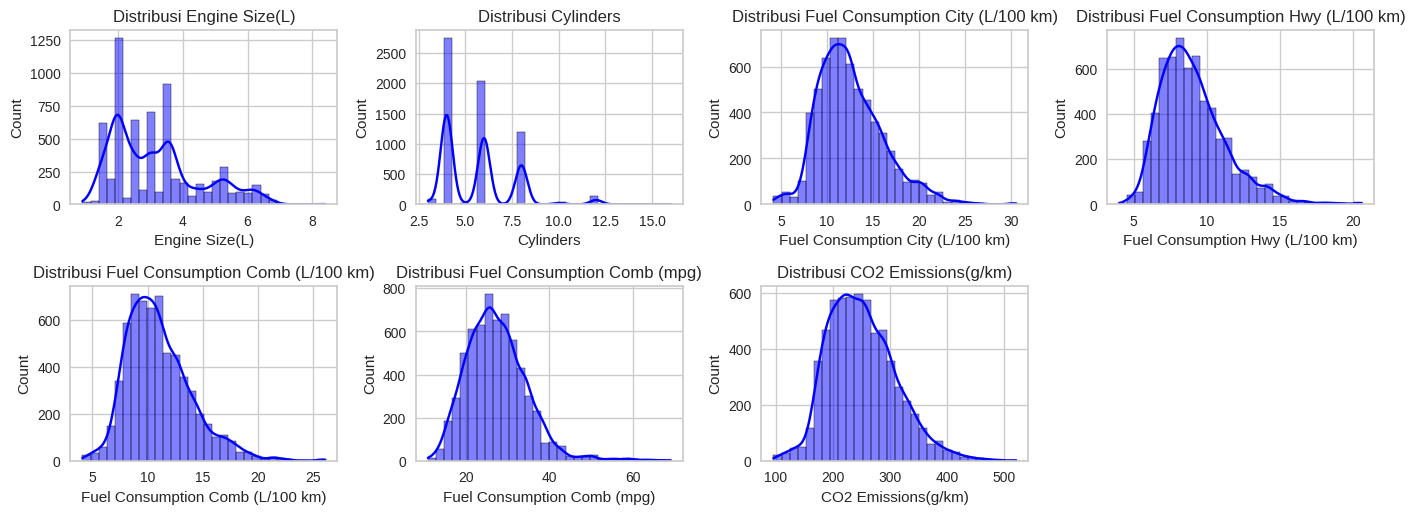

In [18]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()


Notes:
> Since bot removing the outliers and ignoring outlier doesn't hurt the clustering performance result too much. submitter decided to ignore the outlier by not using the cleaned_df.


## encoding categorical features

In [19]:
encoder =  OneHotEncoder()
encoded_brands = encoder.fit_transform(df[['Fuel Type']]).toarray()
encoded_cols = encoder.get_feature_names_out(['Fuel Type'])

In [20]:
print(encoded_cols)

['Fuel Type_D' 'Fuel Type_E' 'Fuel Type_N' 'Fuel Type_X' 'Fuel Type_Z']


## picking features

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
 12  Outlier    

In [22]:

df_features = df[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)' ]]

## Normalizing feature

In [23]:
# minmax scaller
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(df_features)

# standard scaler
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(df_features)

## combined normalize feature and encoded categoric feature

In [24]:
minmax_feat = np.hstack([minmax_scaled, encoded_brands])
std_feat = np.hstack([std_scaled, encoded_brands])

In [25]:
minmax_feat_df = pd.DataFrame(minmax_feat)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [26]:
# using Kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(minmax_feat)

labels = kmeans.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [27]:
score = silhouette_score(minmax_feat, labels)
print(f'silhouette score: {score}')

silhouette score: 0.8243477658257785


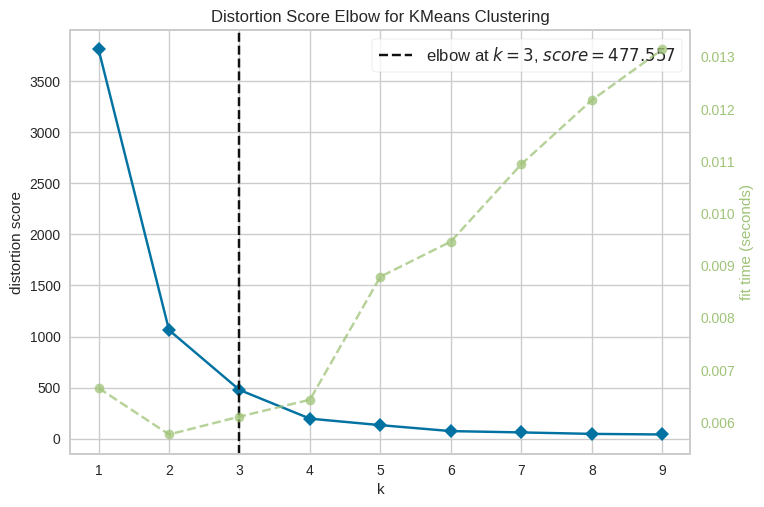

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
minmaxKmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))

visualizer.fit(minmax_feat)
visualizer.show()

### clustering evaluation of minmax scaled feature

In [28]:
# minmaxKmeans = KMeans()
# visualizer = KElbowVisualizer(minmaxKmeans, k=(1,10), title='Distortion score Elbow for KMeans Clustering with minmax scaled features')

# visualizer.fit(minmax_feat)
# visualizer.show()

In [29]:
# # Range of k values
# k_values = range(2, 10)  # Silhouette requires at least 2 clusters
# silhouette_scores = []

# for k in k_values:
#     km = KMeans(n_clusters=k, random_state=42)
#     km.fit(minmax_feat)
#     score = silhouette_score(minmax_feat, kmeans.labels_)
#     silhouette_scores.append(score)

# # Plot the Silhouette Scores
# plt.plot(k_values, silhouette_scores, marker='o')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette score with minxmax scaled data')
# plt.show()

### clustering evaluation of standard scaled feature

In [30]:
# stdKmeans = KMeans()
# visualizer = KElbowVisualizer(kmeans, k=(1,10), title='Distortion score Elbow for KMeans Clustering with standard scaled features')

# visualizer.fit(std_feat)
# visualizer.set_title('Distortion score Elbow for KMeans Clustering with standard scaled features')
# visualizer.show()

In [31]:
# # Range of k values
# k_values = range(2, 10)  # Silhouette requires at least 2 clusters
# silhouette_scores = []

# for k in k_values:
#     km = KMeans(n_clusters=k, random_state=42)
#     km.fit(std_feat)
#     score = silhouette_score(std_feat, kmeans.labels_)
#     silhouette_scores.append(score)

# # Plot the Silhouette Scores
# plt.plot(k_values, silhouette_scores, marker='o')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette score with standard scaled data')
# plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [32]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

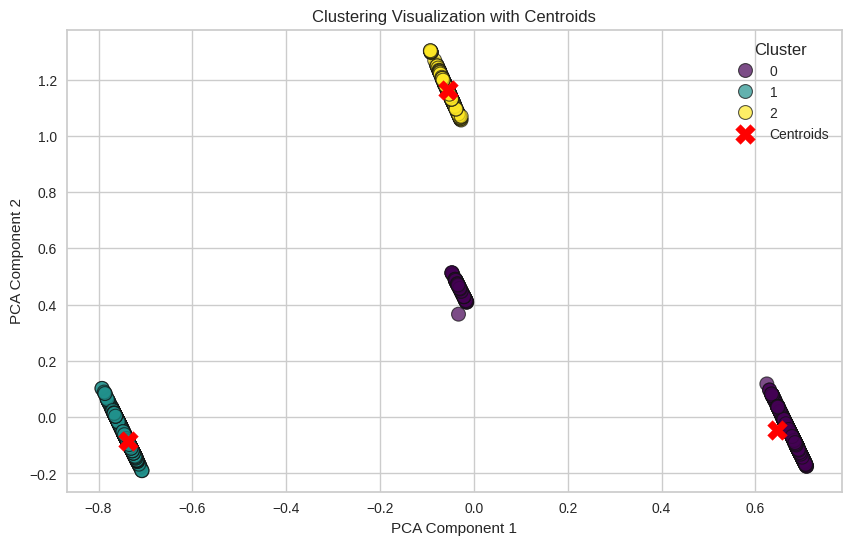

In [33]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(minmax_feat)

centroids = kmeans.cluster_centers_

pca_centroids = pca.transform(centroids)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=df['cluster'],
    palette='viridis',
    s=100,
    alpha=0.7,
    edgecolor='k'
)

# Add centroids to the plot
plt.scatter(
    pca_centroids[:, 0],
    pca_centroids[:, 1],
    color='red',
    s=200,  # Larger size for centroids
    marker='X',  # Different marker for centroids
    label='Centroids'
)

plt.title("Clustering Visualization with Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [34]:
og_numeric_feat = df_features.iloc[:, :2]
denormalized_numerical = minmax_scaler.inverse_transform(centroids[:, :2])

dominant_fuel_types = [
    encoded_cols[np.argmax(centroid[2:])] for centroid in centroids
]

# Combine denormalized numerical features and fuel type
denormalized_centroids = pd.DataFrame(denormalized_numerical, columns=['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)'])
denormalized_centroids['Fuel Type'] = dominant_fuel_types

denormalized_centroids


,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel Type
0,10.062849,235.936618,Fuel Type_X
1,11.413165,265.731284,Fuel Type_Z
2,16.929091,276.048485,Fuel Type_E


In [35]:
cluster_composition = df.groupby(by=['cluster', 'Fuel Type']).size().unstack(fill_value=0)
cluster_proportions = cluster_composition.div(cluster_composition.sum(axis=1), axis=0)

cluster_counts = pd.DataFrame(cluster_composition)
cluster_proportions= pd.DataFrame(cluster_proportions)

In [36]:
cluster_counts

Fuel Type,D,E,N,X,Z
cluster,,,,,
0,147,0,1,3039,0
1,0,0,0,0,2765
2,0,330,0,0,0


In [37]:
cluster_proportions

Fuel Type,D,E,N,X,Z
cluster,,,,,
0,0.046125,0.0,0.000314,0.953561,0.0
1,0.000000,0.0,0.000000,0.000000,1.0
2,0.000000,1.0,0.000000,0.000000,0.0


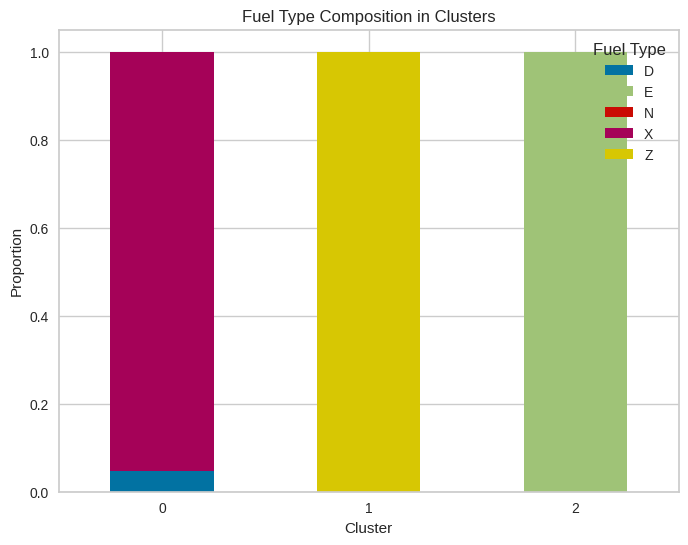

In [38]:
# Plotting cluster proportions
cluster_proportions.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Fuel Type Composition in Clusters")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.ylabel("Proportion")
plt.legend(title="Fuel Type")
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1: Has a lower fuel consumption (10.06 L/100 km) and CO2 emissions (235.94 g/km), and is dominated by fuel type X.

2. Cluster 2: Slightly higher fuel consumption (11.41 L/100 km) and CO2 emissions (265.73 g/km), and is occupied by fuel type Z.

3. Cluster 3: Significantly higher fuel consumption (16.93 L/100 km) and moderate CO2 emissions (276.05 g/km), and is occupied by fuel type E.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [39]:
df.to_csv('clustered_co2.csv')